<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(0_4)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.4_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,75.227962,93.828178,81.032397,44.036928,3.631570,307.757035,304.025815,3.731221
1,0.0,1.0,37.784476,85.753409,80.484406,98.817177,2.351353,315.190822,312.978622,2.212200
2,0.0,2.0,93.271998,78.911735,78.630638,66.769966,-3.284876,324.299461,327.410524,-3.111063
3,0.0,3.0,77.965175,92.564477,29.731410,27.831813,-0.962395,237.130480,238.297775,-1.167295
4,0.0,4.0,81.021787,79.000615,53.359350,70.398998,-0.092611,293.688139,293.839430,-0.151290
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,95.298963,64.298577,87.233767,71.641024,-0.976923,327.495408,328.588569,-1.093160
249996,999.0,246.0,41.448416,24.851381,52.542667,46.841156,1.011574,176.695194,175.626522,1.068672
249997,999.0,247.0,25.531625,30.314829,31.932522,34.956156,0.731834,133.466967,132.507696,0.959270
249998,999.0,248.0,30.981507,21.862527,25.858448,40.826045,-2.573934,126.954593,129.373935,-2.419342


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    75.227962  93.828178  81.032397  44.036928  3.631570  307.757035   
      1.0    37.784476  85.753409  80.484406  98.817177  2.351353  315.190822   
      2.0    93.271998  78.911735  78.630638  66.769966 -3.284876  324.299461   
      3.0    77.965175  92.564477  29.731410  27.831813 -0.962395  237.130480   
      4.0    81.021787  79.000615  53.359350  70.398998 -0.092611  293.688139   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  95.298963  64.298577  87.233767  71.641024 -0.976923  327.495408   
      246.0  41.448416  24.851381  52.542667  46.841156  1.011574  176.695194   
      247.0  25.531625  30.314829  31.932522  34.956156  0.731834  133.466967   
      248.0  30.981507  21.862527  25.858448  40.826045 -2.573934  126.954593   
      249.0  90.187052  73.892625  57.711375  31.391451 -2.273530  260.908973   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    304.025815  3.731221  
      1.0    312.978622  2.212200  
      2.0    327.410524 -3.111063  
      3.0    238.297775 -1.167295  
      4.0    293.839430 -0.151290  
...                 ...       ...  
999.0 245.0  328.588569 -1.093160  
      246.0  175.626522  1.068672  
      247.0  132.507696  0.959270  
      248.0  129.373935 -2.419342  
      249.0  262.993827 -2.084854  

[250000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    75.227962  93.828178  81.032397  44.036928  3.631570  307.757035   
      1.0    37.784476  85.753409  80.484406  98.817177  2.351353  315.190822   
      2.0    93.271998  78.911735  78.630638  66.769966 -3.284876  324.299461   
      3.0    77.965175  92.564477  29.731410  27.831813 -0.962395  237.130480   
      4.0    81.021787  79.000615  53.359350  70.398998 -0.092611  293.688139   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  95.298963  64.298577  87.233767  71.641024 -0.976923  327.495408   
      246.0  41.448416  24.851381  52.542667  46.841156  1.011574  176.695194   
      247.0  25.531625  30.314829  31.932522  34.956156  0.731834  133.466967   
      248.0  30.981507  21.862527  25.858448  40.826045 -2.573934  126.954593   
      249.0  90.187052  73.892625  57.711375  31.391451 -2.273530  260.908973   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    304.025815  3.731221  
      1.0    312.978622  2.212200  
      2.0    327.410524 -3.111063  
      3.0    238.297775 -1.167295  
      4.0    293.839430 -0.151290  
...                 ...       ...  
999.0 245.0  328.588569 -1.093160  
      246.0  175.626522  1.068672  
      247.0  132.507696  0.959270  
      248.0  129.373935 -2.419342  
      249.0  262.993827 -2.084854  

[250000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,75.227962,93.828178,81.032397,44.036928,3.631570,307.757035,304.025815,3.731221
1,0.0,1.0,37.784476,85.753409,80.484406,98.817177,2.351353,315.190822,312.978622,2.212200
2,0.0,2.0,93.271998,78.911735,78.630638,66.769966,-3.284876,324.299461,327.410524,-3.111063
3,0.0,3.0,77.965175,92.564477,29.731410,27.831813,-0.962395,237.130480,238.297775,-1.167295
4,0.0,4.0,81.021787,79.000615,53.359350,70.398998,-0.092611,293.688139,293.839430,-0.151290
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,95.298963,64.298577,87.233767,71.641024,-0.976923,327.495408,328.588569,-1.093160
249996,999.0,246.0,41.448416,24.851381,52.542667,46.841156,1.011574,176.695194,175.626522,1.068672
249997,999.0,247.0,25.531625,30.314829,31.932522,34.956156,0.731834,133.466967,132.507696,0.959270
249998,999.0,248.0,30.981507,21.862527,25.858448,40.826045,-2.573934,126.954593,129.373935,-2.419342


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    75.227962  93.828178  81.032397  44.036928  3.631570  307.757035   
      1.0    37.784476  85.753409  80.484406  98.817177  2.351353  315.190822   
      2.0    93.271998  78.911735  78.630638  66.769966 -3.284876  324.299461   
      3.0    77.965175  92.564477  29.731410  27.831813 -0.962395  237.130480   
      4.0    81.021787  79.000615  53.359350  70.398998 -0.092611  293.688139   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  95.298963  64.298577  87.233767  71.641024 -0.976923  327.495408   
      246.0  41.448416  24.851381  52.542667  46.841156  1.011574  176.695194   
      247.0  25.531625  30.314829  31.932522  34.956156  0.731834  133.466967   
      248.0  30.981507  21.862527  25.858448  40.826045 -2.573934  126.954593   
      249.0  90.187052  73.892625  57.711375  31.391451 -2.273530  260.908973   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    304.025815  3.731221  
      1.0    312.978622  2.212200  
      2.0    327.410524 -3.111063  
      3.0    238.297775 -1.167295  
      4.0    293.839430 -0.151290  
...                 ...       ...  
999.0 245.0  328.588569 -1.093160  
      246.0  175.626522  1.068672  
      247.0  132.507696  0.959270  
      248.0  129.373935 -2.419342  
      249.0  262.993827 -2.084854  

[250000 rows x 8 columns]

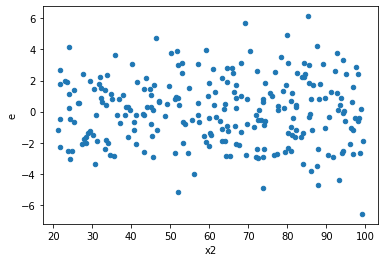

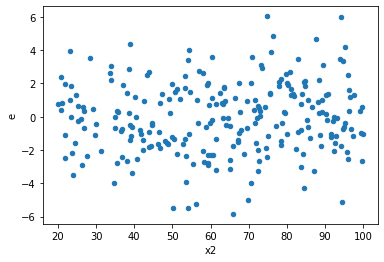

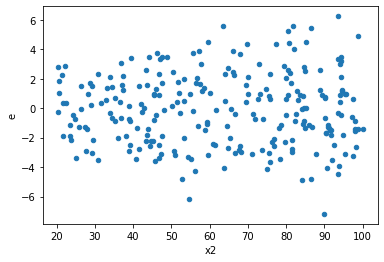

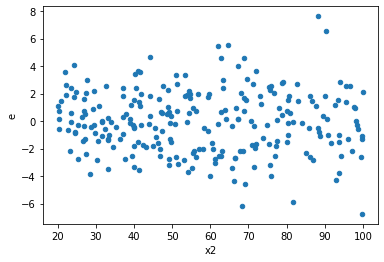

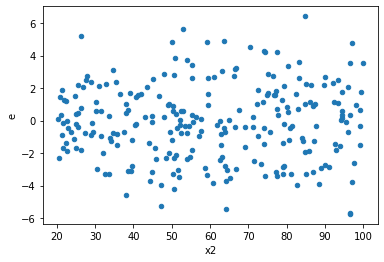

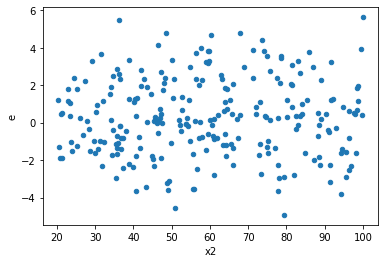

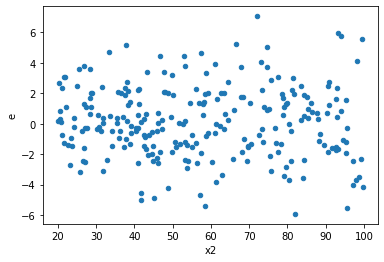

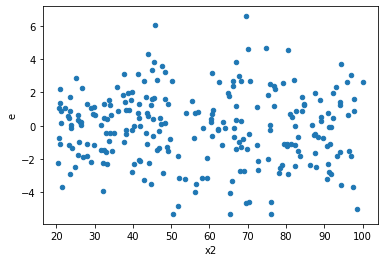

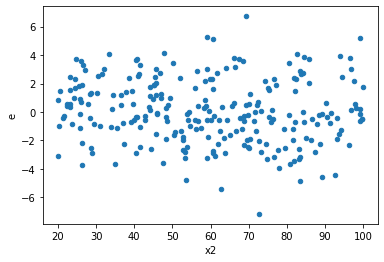

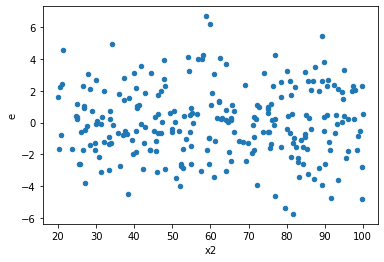

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,126.0,116.0,552.1061535637355,622.6874599133645,4.381794869553456,5.367995344080728,1.2250676957471938,0.26776961733343585,0.8661151913332821,0.13388480866671792,Reject005=1 : Homoscedasticity
3.0,114.0,128.0,550.1637484372712,637.9653250001118,4.825997793309397,4.984104101563373,1.0327613718500182,0.8569928356257057,0.5715035821871471,0.42849641781285286,Reject005=1 : Homoscedasticity
10.0,121.0,121.0,457.25487838383805,585.4435883585345,3.7789659370565127,4.838376763293674,1.2803441057376532,0.17551726588688354,0.9122413670565582,0.08775863294344177,Reject005=1 : Homoscedasticity
11.0,116.0,126.0,509.59009217048697,597.764074502237,4.3930180359524735,4.744159321446325,1.0799316739927107,0.6712852770097217,0.6643573614951391,0.33564263850486087,Reject005=1 : Homoscedasticity
15.0,129.0,113.0,544.3683186913249,503.44965612881924,4.219909447219573,4.45530669140548,1.0557825344667067,0.7694712535396413,0.6152643732301794,0.38473562676982065,Reject005=1 : Homoscedasticity
16.0,125.0,117.0,646.2038345488453,664.7314670359891,5.169630676390763,5.6814655302221295,1.0990080115720589,0.606192016822984,0.696903991588508,0.303096008411492,Reject005=1 : Homoscedasticity
17.0,131.0,111.0,577.8797227623648,550.5377477452334,4.411295593605838,4.959799529236338,1.124340780161174,0.5255569296558151,0.7372215351720924,0.26277846482790757,Reject005=1 : Homoscedasticity
18.0,114.0,128.0,477.808617048539,708.4922525383133,4.191303658320518,5.535095722955573,1.3206143420239613,0.1262720354449347,0.9368639822775326,0.06313601772246735,Reject005=1 : Homoscedasticity
21.0,133.0,109.0,629.0669092044873,573.8967340211807,4.729826384996145,5.265107651570465,1.1131714407683815,0.5630424139403498,0.7184787930298251,0.2815212069701749,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,126.0,116.0,552.1061535637355,622.6874599133645,4.381794869553456,5.367995344080728,1.2250676957471938,0.26776961733343585,Reject005=1 : Homoscedasticity
1.0,126.0,116.0,652.7897691867586,532.0167856718577,5.1808711840218935,4.586351600619463,0.8852471790389301,0.5020332094087592,Reject005=1 : Homoscedasticity
2.0,119.0,123.0,529.2279112556504,490.04649404645755,4.4472933718962215,3.9841178377760778,0.8958522644251246,0.5470274471661403,Reject005=1 : Homoscedasticity
3.0,114.0,128.0,550.1637484372712,637.9653250001118,4.825997793309397,4.984104101563373,1.0327613718500182,0.8569928356257057,Reject005=1 : Homoscedasticity
4.0,131.0,111.0,737.4288216479591,575.0662580173057,5.629227646167627,5.180777099255006,0.9203353328199605,0.6458197308653983,Reject005=1 : Homoscedasticity
5.0,110.0,132.0,531.1701996404154,599.706189698088,4.828819996731049,4.543228709834,0.9408569200984122,0.7434025049167083,Reject005=1 : Homoscedasticity
6.0,117.0,125.0,725.4015772875564,684.4730091193068,6.200013481090226,5.475784072954454,0.883189059129526,0.49731891535297296,Reject005=1 : Homoscedasticity
7.0,128.0,114.0,739.1602027995432,533.9237065795242,5.774689084371431,4.683541285785299,0.8110464853355993,0.24917876169869482,Reject005=1 : Homoscedasticity
8.0,98.0,144.0,561.5908161481727,743.2597356046572,5.730518532124211,5.161525941699008,0.9007083587225941,0.5824874250373664,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      897
Reject005=0 : Heteroscedasticity    103
Name: Result_test, dtype: int64